# Hi Data People!
This notebook is mainly for Coursera Capstone Project. In this project, I will use the Collision Dataset to predict whether a vehicle accident belongs to a certain class. The classes contained in this dataset are: 'Property Damage' and 'Injury'.

Almost every day, on the road there will always be an accident. Whether it's due to wet road conditions, lack of lighting, because the driver is drunk, the weather and so on. The impact of the accident can vary. Some have an impact on property damage or even injured victims.

To get responsive handling, if an accident occurs that results in an injured victim, we need to identify the accident more quickly. By using machine learning, we can predict the impact of an accident, so that, if an accident occurs that results in an injured victim, an ambulance can be immediately dispatched even before there is a report that a victim is injured.


Using Machine Learning, I hope that the reported crash conditions can be predicted earlier. So, if a certain accident is included in the 'Injury' category, the ambulance from the nearest hospital can go directly to the scene, to help the casualties.

### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | ---|
| OBJECTID | Long | ESRI unique identifier |
| SHAPE | Geometry | ESRI geometry field |
| INCKEY | Long | A unique key for the incident |
| ADDRTYPE | Text, 12 | Collision address type: Alley, Block, Intersection |
| INTKEY | Double | Key that corresponds to the intersection associated with a collision |
| LOCATION | Text, 255 | Description of the general location of the collision |
| EXCEPTRSNCODE | Text, 10 | |
| EXCEPTRSNDESC | Text, 300 | |
| SEVERITYCODE | Text, 100 | A code that corresponds to the severity of the collision: 3—fatality, 2b—serious injury, 2—injury, 1—prop damage, 0—unknown |
| SEVERITYDESC | Text | A detailed description of the severity of the collision |
| COLLISIONTYPE | Text, 300 | Collision Type |
| PERSONCOUNT | Double | The total number of people involved in the collision |
| PEDCOUNT | Double | The number of pedestrians involved in the collision. This is entered by the state. |
| PEDCYLCOUNT | Double | The number of bicycles involved in the collision. This is entered by the state. |
| VEHCOUNT | Double | The number of vehicles involved in the collision. This is entered by the state. |
| INJURIES | Double | The number of total injuries in the collision. This is entered by the state. |
| SERIOUSINJURIES | Double | The number of serious injuries in the collision. This is entered by the state. |
| FATALITIES | Double | The number of fatalities in the collision. This is entered by the state. | 
| INCDATE | Date | The date of the incident. |
| INCDTTM | Text, 30 | The date and time of the incident. |
| JUNCTIONTYPE | Text, 300 | Category of junction at which collision took place |
| SDOT_COLCODE | Text, 10 | A code given to the collision by SDOT. |
| SDOT_COLDESC | Text, 300 | A description of the collision corresponding to the collision code. |
| INATTENTIONIND | Text, 1 | Whether or not collision was due to inattention. (Y/N) |
| UNDERINFL | Text, 10 | Whether or not a driver involved was under the influence of drugs or alcohol. |
| WEATHER | Text, 300 | A description of the weather conditions during the time of the collision. |
| ROADCOND | Text, 300 | The condition of the road during the collision. |
| LIGHTCOND | Text, 300 | The light conditions during the collision. |
| PEDROWNOTGRNT | Text, 1 | Whether or not the pedestrian right of way was not granted. (Y/N) |
| SDOTCOLNUM | Text, 10 | A number given to the collision by SDOT. |
| SPEEDING | Text, 1 | Whether or not speeding was a factor in the collision. (Y/N) |
| ST_COLCODE | Text, 10 | A code provided by the state that describes the collision. For more information about these codes, please see the State Collision Code Dictionary. | 
| ST_COLDESC | Text, 300 | A description that corresponds to the state’s coding designation. |
| SEGLANEKEY | Long | A key for the lane segment in which the collision occurred. |
| CROSSWALKKEY | Long | A key for the crosswalk at which the collision occurred. |
| HITPARKEDCAR | Text, 1 | Whether or not the collision involved hitting a parked car. (Y/N) |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [3]:
df = pd.read_csv('Data-Collisions.csv', low_memory=False)
df.head(2)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N


In [4]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [5]:
df['SEVERITYCODE'].value_counts(normalize=True)

1    0.701099
2    0.298901
Name: SEVERITYCODE, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

## Checking all columns information

In [7]:
info = []
for col in df.columns.tolist():
    info_col = []
    info_col.append(col)
    info_col.append(df[col].dtype)
    info_col.append(df[col].isna().sum())
    info_col.append(round(df[col].isna().sum()/len(df)*100, 2))
    info_col.append(df[col].nunique())
    info_col.append(df[col].unique()[0:3])
    info.append(info_col)
info_df = pd.DataFrame(info, columns='col_name dtype nan_values nan_pct unique unique_sample'.split()).sort_values('nan_pct', ascending=False)
info_df

,col_name,dtype,nan_values,nan_pct,unique,unique_sample
30,PEDROWNOTGRNT,object,190006,97.60,1,"[nan, Y]"
12,EXCEPTRSNDESC,object,189035,97.10,1,"[nan, Not Enough Information, or Insufficient ..."
32,SPEEDING,object,185340,95.21,1,"[nan, Y]"
25,INATTENTIONIND,object,164868,84.69,1,"[nan, Y]"
9,INTKEY,float64,129603,66.57,7614,"[37475.0, nan, 34387.0]"
11,EXCEPTRSNCODE,object,109862,56.43,2,"[ , nan, NEI]"
31,SDOTCOLNUM,float64,79737,40.96,114932,"[nan, 6354039.0, 4323031.0]"
22,JUNCTIONTYPE,object,6329,3.25,7,"[At Intersection (intersection related), Mid-B..."
1,X,float64,5334,2.74,23563,"[-122.32314840000002, -122.3472943, -122.33453..."
2,Y,float64,5334,2.74,23839,"[47.70314032, 47.64717249, 47.60787143]"


## Dropping unimportant columns
To predict whether an accident is included in the category of prop damage or injury, we need to delete some columns that have no relation to the accident information.

In [8]:
need_to_drop = info_df['col_name'].head(6).tolist()
need_to_drop.extend('X,Y,SEVERITYCODE.1,REPORTNO,COLDETKEY,INCKEY,OBJECTID,CROSSWALKKEY,SEGLANEKEY,LOCATION,SDOTCOLNUM'.split(','))
df.drop(need_to_drop, axis=1, inplace=True)

In [9]:
info2 = []
for col in df.columns.tolist():
    info_col = []
    info_col.append(col)
    info_col.append(df[col].dtype)
    info_col.append(df[col].isna().sum())
    info_col.append(round(df[col].isna().sum()/len(df)*100, 2))
    info_col.append(df[col].nunique())
    info_col.append(df[col].unique()[0:3])
    info2.append(info_col)
info_df2 = pd.DataFrame(info2, columns='col_name dtype nan_values nan_pct unique unique_sample'.split()).sort_values('nan_pct', ascending=False)
info_df2

,col_name,dtype,nan_values,nan_pct,unique,unique_sample
11,JUNCTIONTYPE,object,6329,3.25,7,"[At Intersection (intersection related), Mid-B..."
17,LIGHTCOND,object,5170,2.66,9,"[Daylight, Dark - Street Lights On, Dark - No ..."
15,WEATHER,object,5081,2.61,11,"[Overcast, Raining, Clear]"
16,ROADCOND,object,5012,2.57,9,"[Wet, Dry, nan]"
19,ST_COLDESC,object,4904,2.52,62,"[Entering at angle, From same direction - both..."
4,COLLISIONTYPE,object,4904,2.52,10,"[Angles, Sideswipe, Parked Car]"
14,UNDERINFL,object,4884,2.51,4,"[N, 0, nan]"
2,ADDRTYPE,object,1926,0.99,3,"[Intersection, Block, Alley]"
18,ST_COLCODE,object,18,0.01,63,"[10, 11, 32]"
0,SEVERITYCODE,int64,0,0.00,2,"[2, 1]"


## Cleaning `ST_COLCODE`
In the 'ST_COLCODE' column we can see that the dtype of this column is Object. Even though the value in it is in the form of digits. We need to check first, whether there are certain conditions that cause this to occur.

In [10]:
df['ST_COLCODE'].unique()

array(['10', '11', '32', '23', '5', '22', '14', '30', ' ', '28', '51',
       '13', '50', '12', '45', '0', '20', '21', '1', '52', '16', '15',
       '74', '81', '26', '19', '2', '66', '71', '3', '24', '40', '57',
       '6', '83', '25', '27', '4', '72', '29', '56', '73', '41', '17',
       '65', '82', '67', '49', '84', '31', '43', '42', '48', '64', '53',
       '54', '60', '87', nan, '7', '8', '85', '88', '18'], dtype=object)

It turns out that there is only one data which is only 'white space'. From here we can convert the data into NaN. Then change column data type `ST_COLCODE` into` float`.

In [11]:
df['ST_COLCODE'].replace(' ', np.nan, inplace=True)
df['ST_COLCODE'].unique()

array(['10', '11', '32', '23', '5', '22', '14', '30', nan, '28', '51',
       '13', '50', '12', '45', '0', '20', '21', '1', '52', '16', '15',
       '74', '81', '26', '19', '2', '66', '71', '3', '24', '40', '57',
       '6', '83', '25', '27', '4', '72', '29', '56', '73', '41', '17',
       '65', '82', '67', '49', '84', '31', '43', '42', '48', '64', '53',
       '54', '60', '87', '7', '8', '85', '88', '18'], dtype=object)

In [12]:
df['ST_COLCODE'] = df['ST_COLCODE'].astype('float')
df['ST_COLCODE'].unique()

array([10., 11., 32., 23.,  5., 22., 14., 30., nan, 28., 51., 13., 50.,
       12., 45.,  0., 20., 21.,  1., 52., 16., 15., 74., 81., 26., 19.,
        2., 66., 71.,  3., 24., 40., 57.,  6., 83., 25., 27.,  4., 72.,
       29., 56., 73., 41., 17., 65., 82., 67., 49., 84., 31., 43., 42.,
       48., 64., 53., 54., 60., 87.,  7.,  8., 85., 88., 18.])

## Change `INCDTTM` and `INCDATE` to Datetime data type
Next, we will change the column data type `INCDTTM` and` INCDATE` to Datetime. Maybe later there is data that we can extract so that we can add information to train
our machine learning model.

In [13]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM']) 
df['INCDATE'] = pd.to_datetime(df['INCDATE'])

In [14]:
info2 = []
for col in df.columns.tolist():
    info_col = []
    info_col.append(col)
    info_col.append(df[col].dtype)
    info_col.append(df[col].isna().sum())
    info_col.append(round(df[col].isna().sum()/len(df)*100, 2))
    info_col.append(df[col].nunique())
    info_col.append(df[col].unique()[0:3])
    info2.append(info_col)
info_df2 = pd.DataFrame(info2, columns='col_name dtype nan_values nan_pct unique unique_sample'.split()).sort_values('nan_pct', ascending=False)
info_df2

,col_name,dtype,nan_values,nan_pct,unique,unique_sample
11,JUNCTIONTYPE,object,6329,3.25,7,"[At Intersection (intersection related), Mid-B..."
17,LIGHTCOND,object,5170,2.66,9,"[Daylight, Dark - Street Lights On, Dark - No ..."
15,WEATHER,object,5081,2.61,11,"[Overcast, Raining, Clear]"
16,ROADCOND,object,5012,2.57,9,"[Wet, Dry, nan]"
19,ST_COLDESC,object,4904,2.52,62,"[Entering at angle, From same direction - both..."
4,COLLISIONTYPE,object,4904,2.52,10,"[Angles, Sideswipe, Parked Car]"
18,ST_COLCODE,float64,4904,2.52,62,"[10.0, 11.0, 32.0]"
14,UNDERINFL,object,4884,2.51,4,"[N, 0, nan]"
2,ADDRTYPE,object,1926,0.99,3,"[Intersection, Block, Alley]"
0,SEVERITYCODE,int64,0,0.00,2,"[2, 1]"


## Cleaning `UNDERINFL`
in the column `UNDERINFL` there are 4 unique values. There should only be 2 unique values in this column, 0 and 1. Which 0 means that the driver is not drunk. And 1 means the driver is drunk. We will change the 'N' and 'Y' values to 0 and 1.

In [15]:
df['UNDERINFL'].unique()

array(['N', '0', nan, '1', 'Y'], dtype=object)

In [16]:
def underinfl(x):
    if x == 'N':
        return 0
    elif x == 'Y':
        return 1
df['UNDERINFL'] = df['UNDERINFL'].apply(underinfl)

In [17]:
info2 = []
for col in df.columns.tolist():
    info_col = []
    info_col.append(col)
    info_col.append(df[col].dtype)
    info_col.append(df[col].isna().sum())
    info_col.append(round(df[col].isna().sum()/len(df)*100, 2))
    info_col.append(df[col].nunique())
    info_col.append(df[col].unique()[0:3])
    info2.append(info_col)
info_df2 = pd.DataFrame(info2, columns='col_name dtype nan_values nan_pct unique unique_sample'.split()).sort_values('nan_pct', ascending=False)
info_df2

,col_name,dtype,nan_values,nan_pct,unique,unique_sample
14,UNDERINFL,float64,89273,45.86,2,"[0.0, nan, 1.0]"
11,JUNCTIONTYPE,object,6329,3.25,7,"[At Intersection (intersection related), Mid-B..."
17,LIGHTCOND,object,5170,2.66,9,"[Daylight, Dark - Street Lights On, Dark - No ..."
15,WEATHER,object,5081,2.61,11,"[Overcast, Raining, Clear]"
16,ROADCOND,object,5012,2.57,9,"[Wet, Dry, nan]"
19,ST_COLDESC,object,4904,2.52,62,"[Entering at angle, From same direction - both..."
4,COLLISIONTYPE,object,4904,2.52,10,"[Angles, Sideswipe, Parked Car]"
18,ST_COLCODE,float64,4904,2.52,62,"[10.0, 11.0, 32.0]"
2,ADDRTYPE,object,1926,0.99,3,"[Intersection, Block, Alley]"
0,SEVERITYCODE,int64,0,0.00,2,"[2, 1]"


## Drop all rows with missing value

In [18]:
df.dropna(inplace=True)

In [19]:
info2 = []
for col in df.columns.tolist():
    info_col = []
    info_col.append(col)
    info_col.append(df[col].dtype)
    info_col.append(df[col].isna().sum())
    info_col.append(round(df[col].isna().sum()/len(df)*100, 2))
    info_col.append(df[col].nunique())
    info_col.append(df[col].unique()[0:3])
    info2.append(info_col)
info_df2 = pd.DataFrame(info2, columns='col_name dtype nan_values nan_pct unique unique_sample'.split()).sort_values('nan_pct', ascending=False)
info_df2.sort_values('unique', ascending=True)

,col_name,dtype,nan_values,nan_pct,unique,unique_sample
1,STATUS,object,0,0.0,1,[Matched]
0,SEVERITYCODE,int64,0,0.0,2,"[2, 1]"
3,SEVERITYDESC,object,0,0.0,2,"[Injury Collision, Property Damage Only Collis..."
14,UNDERINFL,float64,0,0.0,2,"[0.0, 1.0]"
20,HITPARKEDCAR,object,0,0.0,2,"[N, Y]"
2,ADDRTYPE,object,0,0.0,3,"[Intersection, Block, Alley]"
7,PEDCYLCOUNT,int64,0,0.0,3,"[0, 1, 2]"
6,PEDCOUNT,int64,0,0.0,7,"[0, 1, 2]"
11,JUNCTIONTYPE,object,0,0.0,7,"[At Intersection (intersection related), Mid-B..."
16,ROADCOND,object,0,0.0,9,"[Wet, Dry, Unknown]"


## Exploratory Data Analysis
### Severity Code Distribution
From this visualization, we can see that the data we currently have is not balanced. Too many accidents in the `Property Damage` category.

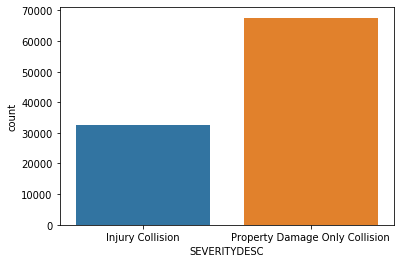

In [20]:
sns.countplot(x='SEVERITYDESC', data=df)
plt.savefig('data_severity_dist.jpg')

In [21]:
round(df['SEVERITYDESC'].value_counts(normalize=True).to_frame(),2)

,SEVERITYDESC
Property Damage Only Collision,0.68
Injury Collision,0.32


## Junction Type

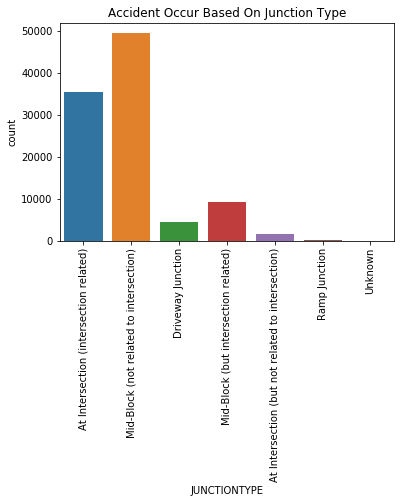

In [22]:
# plt.figure(figsize=(10,6))
sns.countplot(x='JUNCTIONTYPE', data=df)
plt.xticks(rotation=90)
plt.title('Accident Occur Based On Junction Type')
plt.savefig('data_junction_type.jpg')

From this visualization, we can see that the most recorded accident data is Mid-Block or in the middle of a block, but it has nothing to do with the effect of an intersection.

In [23]:
round(df['JUNCTIONTYPE'].value_counts(normalize=True).to_frame(),2)

,JUNCTIONTYPE
Mid-Block (not related to intersection),0.49
At Intersection (intersection related),0.35
Mid-Block (but intersection related),0.09
Driveway Junction,0.04
At Intersection (but not related to intersection),0.01
Ramp Junction,0.00
Unknown,0.00


### Severity Code Distribution vs Junction Type

In [24]:
df['JUNCTIONTYPE'].unique()

array(['At Intersection (intersection related)',
       'Mid-Block (not related to intersection)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'At Intersection (but not related to intersection)',
       'Ramp Junction', 'Unknown'], dtype=object)

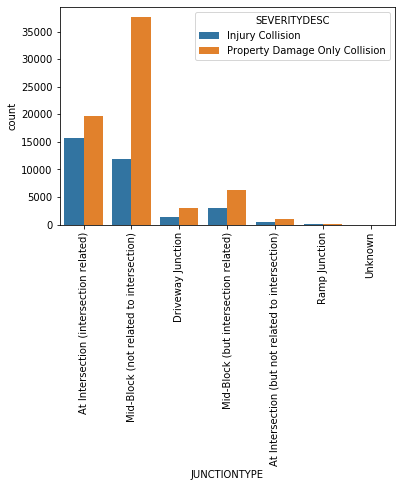

In [25]:
# plt.figure(figsize=(10,6))
sns.countplot(x='JUNCTIONTYPE', data=df, hue='SEVERITYDESC')
plt.xticks(rotation=90)
plt.savefig('data_junction_type_vs_sever_code.jpg')

In [26]:
by_junc = df.groupby('JUNCTIONTYPE')
by_junc['SEVERITYDESC'].value_counts(normalize=True).to_frame()

SEVERITYDESC
JUNCTIONTYPE                                      SEVERITYDESC                                
At Intersection (but not related to intersection) Property Damage Only Collision      0.699866
                                                  Injury Collision                    0.300134
At Intersection (intersection related)            Property Damage Only Collision      0.555166
                                                  Injury Collision                    0.444834
Driveway Junction                                 Property Damage Only Collision      0.676251
                                                  Injury Collision                    0.323749
Mid-Block (but intersection related)              Property Damage Only Collision      0.678705
                                                  Injury Collision                    0.321295
Mid-Block (not related to intersection)           Property Damage Only Collision      0.760658
                                                  Injury Collision                    0.239342
Ramp Junction                                     Property Damage Only Collision      0.659091
                                                  Injury Collision                    0.340909
Unknown                                           Property Damage Only Collision      0.800000
                                                  Injury Collision                    0.200000

And accidents that often occur are accidents with the property damage class with a ratio of 78% compared to the Injury class.

## Light Condition

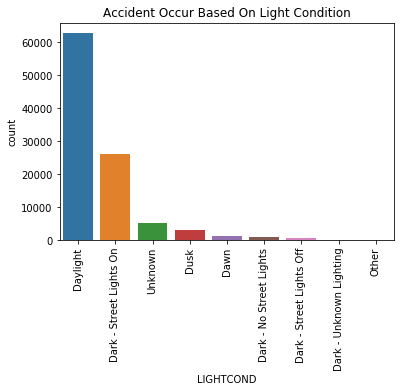

In [98]:
# plt.figure(figsize=(10,6))
sns.countplot(x='LIGHTCOND', data=df)
plt.xticks(rotation=90)
plt.title('Accident Occur Based On Light Condition')
plt.savefig('data_light_cond.jpg')

Interestingly, accidents often occur when conditions are bright.

### Severity Code Distribution vs Light Condition

In [28]:
df['LIGHTCOND'].unique()

array(['Daylight', 'Dark - Street Lights On', 'Unknown', 'Dusk', 'Dawn',
       'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Unknown Lighting', 'Other'], dtype=object)

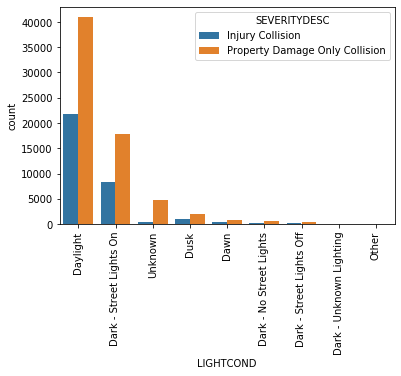

In [99]:
# plt.figure(figsize=(10,6))
sns.countplot(x='LIGHTCOND', data=df, hue='SEVERITYDESC')
plt.xticks(rotation=90)
plt.savefig('data_light_vs_sever_code.jpg')

In [30]:
by_light = df.groupby('LIGHTCOND')
by_light['SEVERITYDESC'].value_counts(normalize=True).to_frame()

SEVERITYDESC
LIGHTCOND                SEVERITYDESC                                
Dark - No Street Lights  Property Damage Only Collision      0.746803
                         Injury Collision                    0.253197
Dark - Street Lights Off Property Damage Only Collision      0.701812
                         Injury Collision                    0.298188
Dark - Street Lights On  Property Damage Only Collision      0.682701
                         Injury Collision                    0.317299
Dark - Unknown Lighting  Property Damage Only Collision      0.636364
                         Injury Collision                    0.363636
Dawn                     Property Damage Only Collision      0.645018
                         Injury Collision                    0.354982
Daylight                 Property Damage Only Collision      0.652146
                         Injury Collision                    0.347854
Dusk                     Property Damage Only Collision      0.647389
                         Injury Collision                    0.352611
Other                    Property Damage Only Collision      0.700000
                         Injury Collision                    0.300000
Unknown                  Property Damage Only Collision      0.935944
                         Injury Collision                    0.064056

And even then the accident is included in the Property Damage class.

## Under Influence (Alcohol)

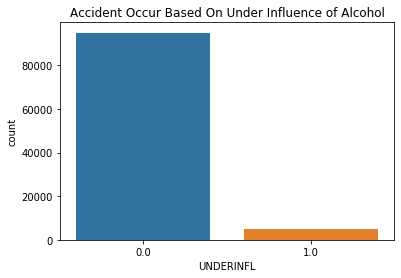

In [31]:
# plt.figure(figsize=(10,6))
sns.countplot(x='UNDERINFL', data=df)
plt.xticks(rotation=0)
plt.title('Accident Occur Based On Under Influence of Alcohol')
plt.savefig('data_underinfl.jpg')

From this data visualization, it can be seen that most accidents do not occur because of drunkenness.

### Severity Code Distribution vs Under Influence (Alcohol)

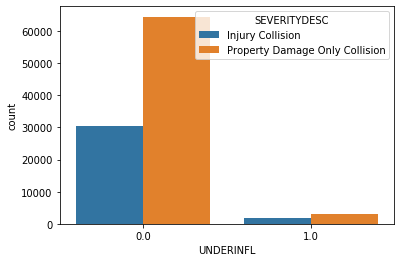

In [32]:
# plt.figure(figsize=(10,6))
sns.countplot(x='UNDERINFL', data=df, hue='SEVERITYDESC')
plt.xticks(rotation=0)
plt.savefig('data_underinfl_vs_sever_code.jpg')

In [33]:
by_infl = df.groupby('UNDERINFL')
by_infl['SEVERITYDESC'].value_counts(normalize=True).to_frame()

SEVERITYDESC
UNDERINFL SEVERITYDESC                                
0.0       Property Damage Only Collision       0.67862
          Injury Collision                     0.32138
1.0       Property Damage Only Collision       0.61992
          Injury Collision                     0.38008

## Address Type

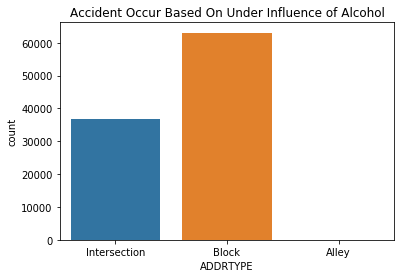

In [34]:
# plt.figure(figsize=(10,6))
sns.countplot(x='ADDRTYPE', data=df)
plt.xticks(rotation=0)
plt.title('Accident Occur Based On Under Influence of Alcohol')
plt.savefig('data_address_type.jpg')

### Severity Code Distribution vs Address Type

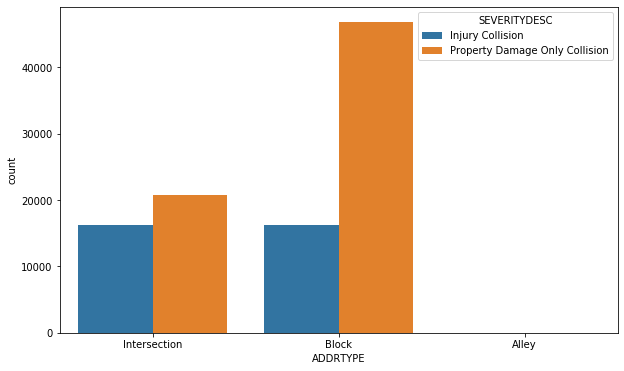

In [100]:
plt.figure(figsize=(10,6))
sns.countplot(x='ADDRTYPE', data=df, hue='SEVERITYDESC')
plt.xticks(rotation=0)
plt.savefig('data_address_type_vs_sever_code.jpg')

In [36]:
by_addr = df.groupby('ADDRTYPE')
by_addr['SEVERITYDESC'].value_counts(normalize=True).to_frame()

SEVERITYDESC
ADDRTYPE     SEVERITYDESC                                
Alley        Property Damage Only Collision      0.869565
             Injury Collision                    0.130435
Block        Property Damage Only Collision      0.742701
             Injury Collision                    0.257299
Intersection Property Damage Only Collision      0.561006
             Injury Collision                    0.438994

## Road Condition

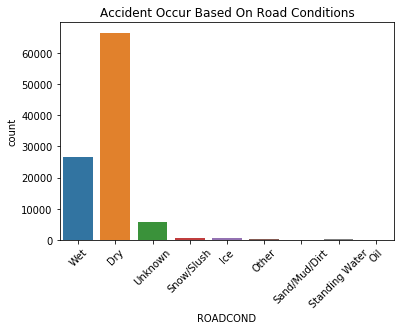

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x='ROADCOND', data=df)
plt.xticks(rotation=45)
plt.title('Accident Occur Based On Road Conditions')
plt.savefig('data_road_cond.jpg')

### Severity Code Distribution vs Road Condition

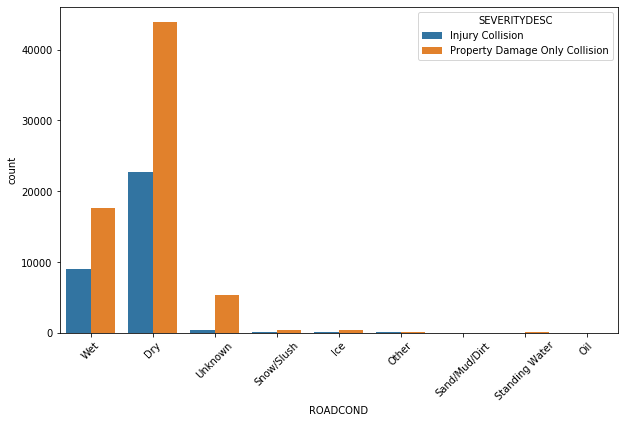

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(x='ROADCOND', data=df, hue='SEVERITYDESC')
plt.xticks(rotation=45)
plt.savefig('data_road_cond_vs_sever_code.jpg')

In [39]:
by_rdcond = df.groupby('ROADCOND')
by_rdcond['SEVERITYDESC'].value_counts(normalize=True).to_frame()

SEVERITYDESC
ROADCOND       SEVERITYDESC                                
Dry            Property Damage Only Collision      0.658988
               Injury Collision                    0.341012
Ice            Property Damage Only Collision      0.722353
               Injury Collision                    0.277647
Oil            Property Damage Only Collision      0.730769
               Injury Collision                    0.269231
Other          Property Damage Only Collision      0.619048
               Injury Collision                    0.380952
Sand/Mud/Dirt  Property Damage Only Collision      0.913043
               Injury Collision                    0.086957
Snow/Slush     Property Damage Only Collision      0.812646
               Injury Collision                    0.187354
Standing Water Property Damage Only Collision      0.716981
               Injury Collision                    0.283019
Unknown        Property Damage Only Collision      0.928596
               Injury Collision                    0.071404
Wet            Property Damage Only Collision      0.660132
               Injury Collision                    0.339868

## Weather

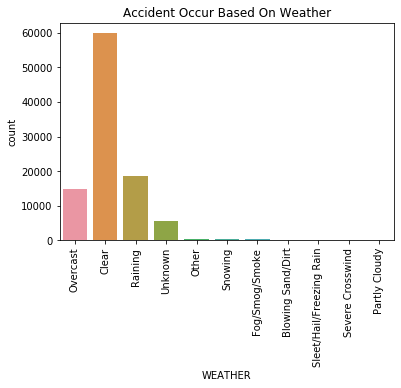

In [101]:
# plt.figure(figsize=(10,6))
sns.countplot(x='WEATHER', data=df)
plt.xticks(rotation=90)
plt.title('Accident Occur Based On Weather')
plt.savefig('data_weather.jpg')

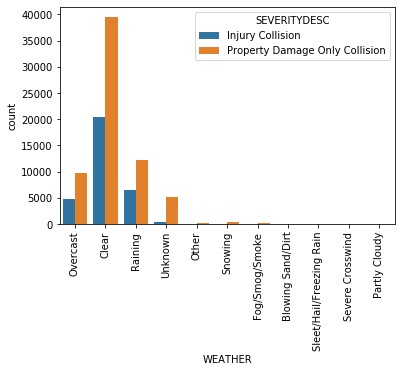

In [102]:
# plt.figure(figsize=(10,6))
sns.countplot(x='WEATHER', data=df, hue='SEVERITYDESC')
plt.xticks(rotation=90)
plt.savefig('data_weather_vs_sever_code.jpg')

In [42]:
by_wthr = df.groupby('WEATHER')
by_wthr['SEVERITYDESC'].value_counts(normalize=True).to_frame()

SEVERITYDESC
WEATHER                  SEVERITYDESC                                
Blowing Sand/Dirt        Property Damage Only Collision      0.740741
                         Injury Collision                    0.259259
Clear                    Property Damage Only Collision      0.658658
                         Injury Collision                    0.341342
Fog/Smog/Smoke           Property Damage Only Collision      0.650146
                         Injury Collision                    0.349854
Other                    Property Damage Only Collision      0.809028
                         Injury Collision                    0.190972
Overcast                 Property Damage Only Collision      0.668635
                         Injury Collision                    0.331365
Partly Cloudy            Injury Collision                    0.600000
                         Property Damage Only Collision      0.400000
Raining                  Property Damage Only Collision      0.655000
                         Injury Collision                    0.345000
Severe Crosswind         Property Damage Only Collision      0.666667
                         Injury Collision                    0.333333
Sleet/Hail/Freezing Rain Property Damage Only Collision      0.790698
                         Injury Collision                    0.209302
Snowing                  Property Damage Only Collision      0.805825
                         Injury Collision                    0.194175
Unknown                  Property Damage Only Collision      0.931675
                         Injury Collision                    0.068325

## Collision Type

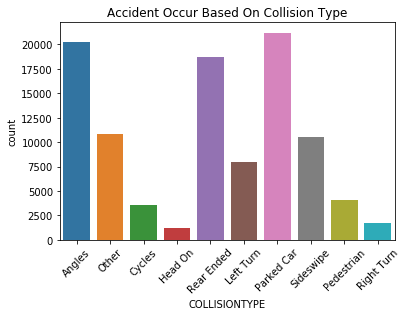

In [43]:
# plt.figure(figsize=(10,6))
sns.countplot(x='COLLISIONTYPE', data=df)
plt.xticks(rotation=45)
plt.title('Accident Occur Based On Collision Type')
plt.savefig('data_collision_type.jpg')

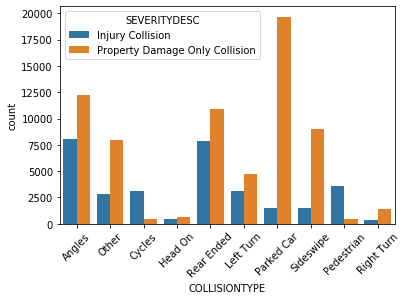

In [44]:
# plt.figure(figsize=(10,6))
sns.countplot(x='COLLISIONTYPE', data=df, hue='SEVERITYDESC')
plt.xticks(rotation=45)
plt.savefig('data_collision_type_vs_sever_code.jpg')

In [45]:
by_coltp = df.groupby('COLLISIONTYPE')
by_coltp['SEVERITYDESC'].value_counts(normalize=True).to_frame()

SEVERITYDESC
COLLISIONTYPE SEVERITYDESC                                
Angles        Property Damage Only Collision      0.605035
              Injury Collision                    0.394965
Cycles        Injury Collision                    0.880478
              Property Damage Only Collision      0.119522
Head On       Property Damage Only Collision      0.577250
              Injury Collision                    0.422750
Left Turn     Property Damage Only Collision      0.601086
              Injury Collision                    0.398914
Other         Property Damage Only Collision      0.739718
              Injury Collision                    0.260282
Parked Car    Property Damage Only Collision      0.928214
              Injury Collision                    0.071786
Pedestrian    Injury Collision                    0.888588
              Property Damage Only Collision      0.111412
Rear Ended    Property Damage Only Collision      0.581003
              Injury Collision                    0.418997
Right Turn    Property Damage Only Collision      0.782683
              Injury Collision                    0.217317
Sideswipe     Property Damage Only Collision      0.858568
              Injury Collision                    0.141432

## Incident By Hour

In [46]:
df.head()

,SEVERITYCODE,STATUS,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,2,Matched,Intersection,Injury Collision,Angles,2,0,0,2,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Overcast,Wet,Daylight,10.0,Entering at angle,N
3,1,Matched,Block,Property Damage Only Collision,Other,3,0,0,3,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Daylight,23.0,From same direction - all others,N
5,1,Matched,Intersection,Property Damage Only Collision,Angles,2,0,0,2,2019-04-20 00:00:00+00:00,2019-04-20 17:42:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Daylight,10.0,Entering at angle,N
7,2,Matched,Intersection,Injury Collision,Cycles,3,0,1,1,2020-04-15 00:00:00+00:00,2020-04-15 17:47:00,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,0.0,Clear,Dry,Daylight,5.0,Vehicle Strikes Pedalcyclist,N
14,2,Matched,Block,Injury Collision,Head On,2,0,0,2,2013-03-31 00:00:00+00:00,2013-03-31 02:09:00,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Dark - Street Lights On,30.0,From opposite direction - all others,N


In [47]:
df['INCDHR'] = df['INCDTTM'].dt.hour

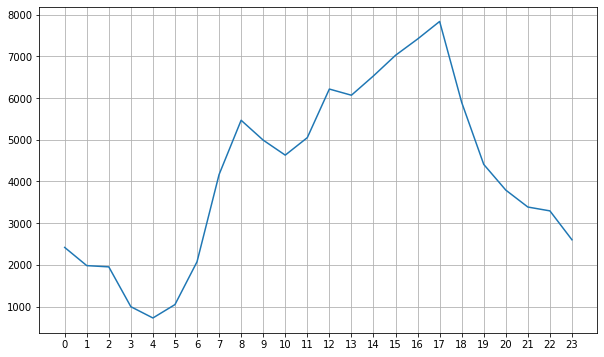

In [48]:
by_hr = df.groupby('INCDHR')
by_hr_count =by_hr.describe()['SEVERITYCODE'].reset_index()
plt.figure(figsize=(10,6))
plt.plot(by_hr_count['INCDHR'], by_hr_count['count'])
plt.grid()
plt.xticks(np.arange(24))
plt.savefig('data_incident_by_hour.jpg')
plt.show()

Many accidents occur during rush hour. In the data visualization above, people are prone to accidents when people start traveling home from work.

### Severity vs Hour

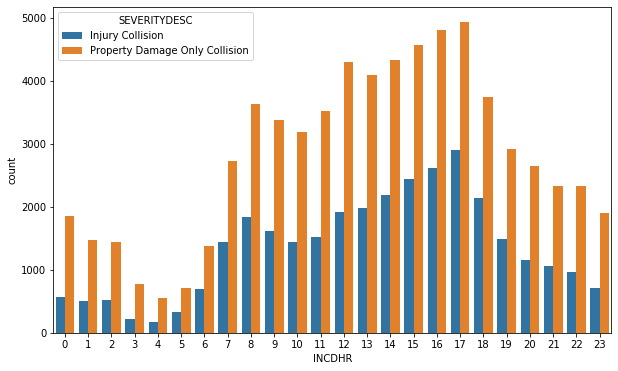

In [103]:
plt.figure(figsize=(10,6))
sns.countplot(x='INCDHR', data=df, hue='SEVERITYDESC')
plt.xticks(rotation=0)
plt.savefig('data_hour_vs_sever.jpg')

In [50]:
by_hr['SEVERITYDESC'].value_counts(normalize=True).to_frame()

SEVERITYDESC
INCDHR SEVERITYDESC                                
0      Property Damage Only Collision      0.766432
       Injury Collision                    0.233568
1      Property Damage Only Collision      0.742814
       Injury Collision                    0.257186
2      Property Damage Only Collision      0.737327
       Injury Collision                    0.262673
3      Property Damage Only Collision      0.775551
       Injury Collision                    0.224449
4      Property Damage Only Collision      0.765110
       Injury Collision                    0.234890
5      Property Damage Only Collision      0.684461
       Injury Collision                    0.315539
6      Property Damage Only Collision      0.663133
       Injury Collision                    0.336867
7      Property Damage Only Collision      0.655305
       Injury Collision                    0.344695
8      Property Damage Only Collision      0.664533
       Injury Collision                    0.335467
9      Property Damage Only Collision      0.675616
       Injury Collision                    0.324384
10     Property Damage Only Collision      0.689916
       Injury Collision                    0.310084
11     Property Damage Only Collision      0.698416
       Injury Collision                    0.301584
12     Property Damage Only Collision      0.692357
       Injury Collision                    0.307643
13     Property Damage Only Collision      0.674139
       Injury Collision                    0.325861
14     Property Damage Only Collision      0.664165
       Injury Collision                    0.335835
15     Property Damage Only Collision      0.651481
       Injury Collision                    0.348519
16     Property Damage Only Collision      0.647559
       Injury Collision                    0.352441
17     Property Damage Only Collision      0.629355
       Injury Collision                    0.370645
18     Property Damage Only Collision      0.635793
       Injury Collision                    0.364207
19     Property Damage Only Collision      0.662962
       Injury Collision                    0.337038
20     Property Damage Only Collision      0.696810
       Injury Collision                    0.303190
21     Property Damage Only Collision      0.687924
       Injury Collision                    0.312076
22     Property Damage Only Collision      0.705311
       Injury Collision                    0.294689
23     Property Damage Only Collision      0.728670
       Injury Collision                    0.271330

### Under Influence (Alcohol) vs Hour

In [51]:
by_hr_pct = by_hr['UNDERINFL'].value_counts(normalize=True).to_frame().rename(columns={'UNDERINFL': 'PCT'})
by_hr_pct = by_hr_pct.reset_index()
by_hr_pct = pd.pivot_table(by_hr_pct, columns='INCDHR', index='UNDERINFL', values='PCT')
by_hr_pct

INCDHR,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
UNDERINFL,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0.814386,0.72819,0.740399,0.814629,0.851648,0.942803,0.982651,0.987998,0.988842,0.990383,0.990067,0.983762,0.990507,0.987638,0.985145,0.986333,0.981791,0.975367,0.961493,0.939896,0.907461,0.876587,0.85736,0.82206
1.0,0.185614,0.27181,0.259601,0.185371,0.148352,0.057197,0.017349,0.012002,0.011158,0.009617,0.009933,0.016238,0.009493,0.012362,0.014855,0.013667,0.018209,0.024633,0.038507,0.060104,0.092539,0.123413,0.14264,0.17794


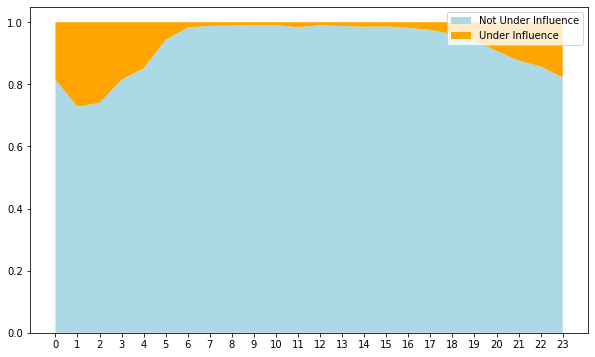

In [52]:
plt.figure(figsize=(10,6))
plt.stackplot(by_hr_pct.columns, by_hr_pct.values, labels=['Not Under Influence','Under Influence'], colors=['lightblue', 'orange'])
plt.xticks(range(24))
plt.legend()
plt.savefig('data_underinfl_vs_hour.jpg')
plt.show()

In [53]:
by_hr['UNDERINFL'].value_counts(normalize=True).to_frame()

UNDERINFL
INCDHR UNDERINFL           
0      0.0         0.814386
       1.0         0.185614
1      0.0         0.728190
       1.0         0.271810
2      0.0         0.740399
       1.0         0.259601
3      0.0         0.814629
       1.0         0.185371
4      0.0         0.851648
       1.0         0.148352
5      0.0         0.942803
       1.0         0.057197
6      0.0         0.982651
       1.0         0.017349
7      0.0         0.987998
       1.0         0.012002
8      0.0         0.988842
       1.0         0.011158
9      0.0         0.990383
       1.0         0.009617
10     0.0         0.990067
       1.0         0.009933
11     0.0         0.983762
       1.0         0.016238
12     0.0         0.990507
       1.0         0.009493
13     0.0         0.987638
       1.0         0.012362
14     0.0         0.985145
       1.0         0.014855
15     0.0         0.986333
       1.0         0.013667
16     0.0         0.981791
       1.0         0.018209
17     0.0         0.975367
       1.0         0.024633
18     0.0         0.961493
       1.0         0.038507
19     0.0         0.939896
       1.0         0.060104
20     0.0         0.907461
       1.0         0.092539
21     0.0         0.876587
       1.0         0.123413
22     0.0         0.857360
       1.0         0.142640
23     0.0         0.822060
       1.0         0.177940

### Collision Type When 00:00 AM

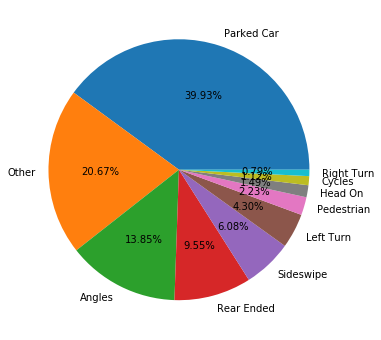

In [54]:
plt.figure(figsize=(10,6))
plt.pie(x=by_hr.get_group(0)['COLLISIONTYPE'].value_counts(normalize=True), labels=by_hr.get_group(0)['COLLISIONTYPE'].value_counts(normalize=True).index, autopct='%.2f%%')
plt.savefig('collision_type_hour_00.jpg')
plt.show()

In [55]:
df.head()

,SEVERITYCODE,STATUS,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR,INCDHR
0,2,Matched,Intersection,Injury Collision,Angles,2,0,0,2,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Overcast,Wet,Daylight,10.0,Entering at angle,N,14
3,1,Matched,Block,Property Damage Only Collision,Other,3,0,0,3,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Daylight,23.0,From same direction - all others,N,9
5,1,Matched,Intersection,Property Damage Only Collision,Angles,2,0,0,2,2019-04-20 00:00:00+00:00,2019-04-20 17:42:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Daylight,10.0,Entering at angle,N,17
7,2,Matched,Intersection,Injury Collision,Cycles,3,0,1,1,2020-04-15 00:00:00+00:00,2020-04-15 17:47:00,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,0.0,Clear,Dry,Daylight,5.0,Vehicle Strikes Pedalcyclist,N,17
14,2,Matched,Block,Injury Collision,Head On,2,0,0,2,2013-03-31 00:00:00+00:00,2013-03-31 02:09:00,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Dark - Street Lights On,30.0,From opposite direction - all others,N,2


In [56]:
df['YEAR'] = df['INCDTTM'].dt.year

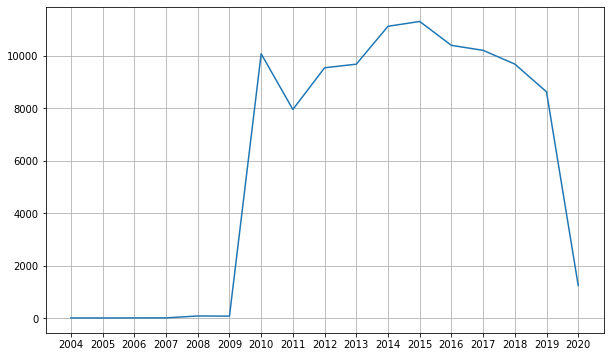

In [57]:
by_yr = df.groupby('YEAR')
by_yr_count =by_yr.describe()['SEVERITYCODE'].reset_index()
plt.figure(figsize=(10,6))
plt.plot(by_yr_count['YEAR'], by_yr_count['count'])
plt.grid()
plt.xticks(np.arange(2004,2021))
plt.savefig('data_accident_by_year.jpg')
plt.show()

In [58]:
by_yr_pct = by_yr['UNDERINFL'].value_counts(normalize=True).to_frame().rename(columns={'UNDERINFL': 'PCT'})
by_yr_pct = by_yr_pct.reset_index()
by_yr_pct = pd.pivot_table(by_yr_pct, columns='YEAR', index='UNDERINFL', values='PCT')
by_yr_pct

YEAR,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
UNDERINFL,,,,,,,,,,,,,,,,,
0.0,1.0,1.0,1.0,1.0,0.961039,0.873239,0.944411,0.936612,0.940048,0.954325,0.955763,0.964267,0.951515,0.95757,0.940089,0.940044,1.0
1.0,NaN,NaN,NaN,NaN,0.038961,0.126761,0.055589,0.063388,0.059952,0.045675,0.044237,0.035733,0.048485,0.04243,0.059911,0.059956,NaN


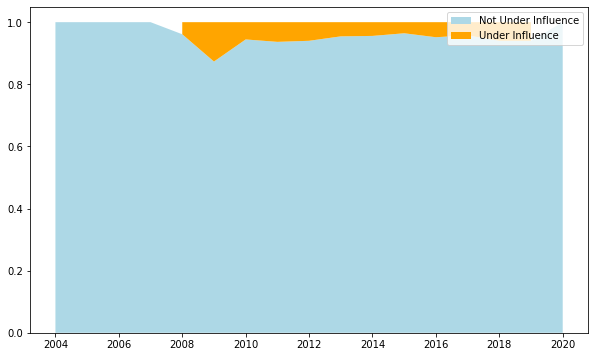

In [59]:
plt.figure(figsize=(10,6))
plt.stackplot(by_yr_pct.columns, by_yr_pct.values, labels=['Not Under Influence','Under Influence'], colors=['lightblue','orange'])
plt.legend()
plt.savefig('data_accident_y_o_y.jpg')
plt.show()

## Building A Machine Learning

In this section, I will try to build a machine learning tool, to predict whether an accident is included in the property damage category or someone is injured.

I will focus on the False Positive results. I will try to reduce the possibility of machine learning being wrong in guessing an accident, which should have occurred with casualties, but is predicted to be an accident that only causes property damage.

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, auc, classification_report, roc_curve
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [61]:
info2 = []
for col in df.columns.tolist():
    info_col = []
    info_col.append(col)
    info_col.append(df[col].dtype)
    info_col.append(df[col].isna().sum())
    info_col.append(round(df[col].isna().sum()/len(df)*100, 2))
    info_col.append(df[col].nunique())
    info_col.append(df[col].unique()[0:3])
    info2.append(info_col)
info_df2 = pd.DataFrame(info2, columns='col_name dtype nan_values nan_pct unique unique_sample'.split()).sort_values('nan_pct', ascending=False)
info_df2.sort_values('unique', ascending=True)

,col_name,dtype,nan_values,nan_pct,unique,unique_sample
1,STATUS,object,0,0.0,1,[Matched]
0,SEVERITYCODE,int64,0,0.0,2,"[2, 1]"
3,SEVERITYDESC,object,0,0.0,2,"[Injury Collision, Property Damage Only Collis..."
20,HITPARKEDCAR,object,0,0.0,2,"[N, Y]"
14,UNDERINFL,float64,0,0.0,2,"[0.0, 1.0]"
7,PEDCYLCOUNT,int64,0,0.0,3,"[0, 1, 2]"
2,ADDRTYPE,object,0,0.0,3,"[Intersection, Block, Alley]"
6,PEDCOUNT,int64,0,0.0,7,"[0, 1, 2]"
11,JUNCTIONTYPE,object,0,0.0,7,"[At Intersection (intersection related), Mid-B..."
16,ROADCOND,object,0,0.0,9,"[Wet, Dry, Unknown]"


In [62]:
df2 = df.drop(['YEAR', 'SEVERITYDESC', 'STATUS', 'INCDATE', 'INCDTTM', 'SDOT_COLDESC', 'ST_COLDESC'], axis=1)
df2.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR,INCDHR
0,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,0.0,Overcast,Wet,Daylight,10.0,N,14
3,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),11,0.0,Clear,Dry,Daylight,23.0,N,9
5,1,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,0.0,Clear,Dry,Daylight,10.0,N,17
7,2,Intersection,Cycles,3,0,1,1,At Intersection (intersection related),51,0.0,Clear,Dry,Daylight,5.0,N,17
14,2,Block,Head On,2,0,0,2,Mid-Block (not related to intersection),11,0.0,Clear,Dry,Dark - Street Lights On,30.0,N,2


In [63]:
info2 = []
for col in df2.columns.tolist():
    info_col = []
    info_col.append(col)
    info_col.append(df2[col].dtype)
    info_col.append(df2[col].isna().sum())
    info_col.append(round(df2[col].isna().sum()/len(df2)*100, 2))
    info_col.append(df2[col].nunique())
    info_col.append(df2[col].unique()[0:3])
    info2.append(info_col)
info_df2 = pd.DataFrame(info2, columns='col_name dtype nan_values nan_pct unique unique_sample'.split()).sort_values('nan_pct', ascending=False)
info_df2.sort_values('unique', ascending=True)

,col_name,dtype,nan_values,nan_pct,unique,unique_sample
0,SEVERITYCODE,int64,0,0.0,2,"[2, 1]"
9,UNDERINFL,float64,0,0.0,2,"[0.0, 1.0]"
14,HITPARKEDCAR,object,0,0.0,2,"[N, Y]"
1,ADDRTYPE,object,0,0.0,3,"[Intersection, Block, Alley]"
5,PEDCYLCOUNT,int64,0,0.0,3,"[0, 1, 2]"
4,PEDCOUNT,int64,0,0.0,7,"[0, 1, 2]"
7,JUNCTIONTYPE,object,0,0.0,7,"[At Intersection (intersection related), Mid-B..."
11,ROADCOND,object,0,0.0,9,"[Wet, Dry, Unknown]"
12,LIGHTCOND,object,0,0.0,9,"[Daylight, Dark - Street Lights On, Unknown]"
2,COLLISIONTYPE,object,0,0.0,10,"[Angles, Other, Cycles]"


In [64]:
df2['ST_COLCODE'] = df2['ST_COLCODE'].astype('int')
dig_col = df2.select_dtypes(exclude='object')
need_to_dum = dig_col[['SDOT_COLCODE', 'UNDERINFL', 'ST_COLCODE']]
code_dum = pd.get_dummies(need_to_dum.astype(str))
code_dum

,SDOT_COLCODE_0,SDOT_COLCODE_11,SDOT_COLCODE_12,SDOT_COLCODE_13,SDOT_COLCODE_14,SDOT_COLCODE_15,SDOT_COLCODE_16,SDOT_COLCODE_18,SDOT_COLCODE_21,SDOT_COLCODE_22,SDOT_COLCODE_23,SDOT_COLCODE_24,SDOT_COLCODE_25,SDOT_COLCODE_26,SDOT_COLCODE_27,SDOT_COLCODE_28,SDOT_COLCODE_29,SDOT_COLCODE_31,SDOT_COLCODE_32,SDOT_COLCODE_33,SDOT_COLCODE_34,SDOT_COLCODE_44,SDOT_COLCODE_48,SDOT_COLCODE_51,SDOT_COLCODE_52,SDOT_COLCODE_53,SDOT_COLCODE_54,SDOT_COLCODE_55,SDOT_COLCODE_56,SDOT_COLCODE_58,SDOT_COLCODE_61,SDOT_COLCODE_64,SDOT_COLCODE_66,SDOT_COLCODE_68,SDOT_COLCODE_69,UNDERINFL_0.0,UNDERINFL_1.0,ST_COLCODE_0,ST_COLCODE_1,ST_COLCODE_10,ST_COLCODE_11,ST_COLCODE_12,ST_COLCODE_13,ST_COLCODE_14,ST_COLCODE_15,ST_COLCODE_16,ST_COLCODE_17,ST_COLCODE_18,ST_COLCODE_19,ST_COLCODE_2,ST_COLCODE_20,ST_COLCODE_22,ST_COLCODE_23,ST_COLCODE_24,ST_COLCODE_25,ST_COLCODE_26,ST_COLCODE_27,ST_COLCODE_28,ST_COLCODE_29,ST_COLCODE_3,ST_COLCODE_30,ST_COLCODE_31,ST_COLCODE_32,ST_COLCODE_4,ST_COLCODE_40,ST_COLCODE_41,ST_COLCODE_42,ST_COLCODE_45,ST_COLCODE_48,ST_COLCODE_5,ST_COLCODE_50,ST_COLCODE_51,ST_COLCODE_52,ST_COLCODE_53,ST_COLCODE_54,ST_COLCODE_56,ST_COLCODE_57,ST_COLCODE_6,ST_COLCODE_64,ST_COLCODE_7,ST_COLCODE_71,ST_COLCODE_72,ST_COLCODE_73,ST_COLCODE_74,ST_COLCODE_8,ST_COLCODE_81,ST_COLCODE_82,ST_COLCODE_83,ST_COLCODE_84,ST_COLCODE_85,ST_COLCODE_87,ST_COLCODE_88
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
194669,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
194670,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
194671,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
dig_col.drop(['SDOT_COLCODE', 'UNDERINFL', 'ST_COLCODE'], axis=1, inplace=True)

C:\Users\R7891\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [66]:
obj_col = df2.select_dtypes(include='object')
obj_dum = pd.get_dummies(obj_col, prefix=obj_col.columns)
obj_dum

,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,HITPARKEDCAR_N,HITPARKEDCAR_Y
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
5,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
7,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
14,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
194669,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
194670,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
194671,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [67]:
obj_col

,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,Intersection,Angles,At Intersection (intersection related),Overcast,Wet,Daylight,N
3,Block,Other,Mid-Block (not related to intersection),Clear,Dry,Daylight,N
5,Intersection,Angles,At Intersection (intersection related),Clear,Dry,Daylight,N
7,Intersection,Cycles,At Intersection (intersection related),Clear,Dry,Daylight,N
14,Block,Head On,Mid-Block (not related to intersection),Clear,Dry,Dark - Street Lights On,N
...,...,...,...,...,...,...,...
194668,Block,Head On,Mid-Block (not related to intersection),Clear,Dry,Daylight,N
194669,Block,Rear Ended,Mid-Block (not related to intersection),Raining,Wet,Daylight,N
194670,Intersection,Left Turn,At Intersection (intersection related),Clear,Dry,Daylight,N
194671,Intersection,Cycles,At Intersection (intersection related),Clear,Dry,Dusk,N


In [68]:
new_df = pd.concat([dig_col, obj_dum, code_dum],axis=1)
new_df

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDHR,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,HITPARKEDCAR_N,HITPARKEDCAR_Y,SDOT_COLCODE_0,SDOT_COLCODE_11,SDOT_COLCODE_12,SDOT_COLCODE_13,SDOT_COLCODE_14,SDOT_COLCODE_15,SDOT_COLCODE_16,SDOT_COLCODE_18,SDOT_COLCODE_21,SDOT_COLCODE_22,SDOT_COLCODE_23,SDOT_COLCODE_24,SDOT_COLCODE_25,SDOT_COLCODE_26,SDOT_COLCODE_27,SDOT_COLCODE_28,SDOT_COLCODE_29,SDOT_COLCODE_31,SDOT_COLCODE_32,SDOT_COLCODE_33,SDOT_COLCODE_34,SDOT_COLCODE_44,SDOT_COLCODE_48,SDOT_COLCODE_51,SDOT_COLCODE_52,SDOT_COLCODE_53,SDOT_COLCODE_54,SDOT_COLCODE_55,SDOT_COLCODE_56,SDOT_COLCODE_58,SDOT_COLCODE_61,SDOT_COLCODE_64,SDOT_COLCODE_66,SDOT_COLCODE_68,SDOT_COLCODE_69,UNDERINFL_0.0,UNDERINFL_1.0,ST_COLCODE_0,ST_COLCODE_1,ST_COLCODE_10,ST_COLCODE_11,ST_COLCODE_12,ST_COLCODE_13,ST_COLCODE_14,ST_COLCODE_15,ST_COLCODE_16,ST_COLCODE_17,ST_COLCODE_18,ST_COLCODE_19,ST_COLCODE_2,ST_COLCODE_20,ST_COLCODE_22,ST_COLCODE_23,ST_COLCODE_24,ST_COLCODE_25,ST_COLCODE_26,ST_COLCODE_27,ST_COLCODE_28,ST_COLCODE_29,ST_COLCODE_3,ST_COLCODE_30,ST_COLCODE_31,ST_COLCODE_32,ST_COLCODE_4,ST_COLCODE_40,ST_COLCODE_41,ST_COLCODE_42,ST_COLCODE_45,ST_COLCODE_48,ST_COLCODE_5,ST_COLCODE_50,ST_COLCODE_51,ST_COLCODE_52,ST_COLCODE_53,ST_COLCODE_54,ST_COLCODE_56,ST_COLCODE_57,ST_COLCODE_6,ST_COLCODE_64,ST_COLCODE_7,ST_COLCODE_71,ST_COLCODE_72,ST_COLCODE_73,ST_COLCODE_74,ST_COLCODE_8,ST_COLCODE_81,ST_COLCODE_82,ST_COLCODE_83,ST_COLCODE_84,ST_COLCODE_85,ST_COLCODE_87,ST_COLCODE_88
0,2,2,0,0,2,14,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,3,0,0,3,9,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,2,0,0,2,17,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2,3,0,1,1,17,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,2,2,0,0,2,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [69]:
round(new_df.memory_usage().sum() * 0.000001, 3) 

22.517

In [70]:
x = new_df.drop('SEVERITYCODE', axis=1)
y = new_df['SEVERITYCODE']

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [72]:
y_train.value_counts(normalize=True)

1    0.673721
2    0.326279
Name: SEVERITYCODE, dtype: float64

In [73]:
sm = SMOTE(random_state=42)
xtr_smot, ytr_smot = sm.fit_resample(x_train, y_train)

In [74]:
ytr_smot.value_counts(normalize=True)

2    0.5
1    0.5
Name: SEVERITYCODE, dtype: float64

In [75]:
df[['SEVERITYCODE', 'SEVERITYDESC']].head(2)

,SEVERITYCODE,SEVERITYDESC
0,2,Injury Collision
3,1,Property Damage Only Collision


## Logistic Regression
Train model using oversampled data

In [76]:
lr = LogisticRegression(solver='saga', random_state=42)
lr.fit(xtr_smot, ytr_smot)
pred_smot = lr.predict(x_test)

C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [77]:
len(lr.coef_[0])

148

In [78]:
confusion_matrix(pred_smot, y_test)

array([[13319,  2447],
       [ 7083,  7144]], dtype=int64)

In [79]:
print(classification_report(pred_smot, y_test))

              precision    recall  f1-score   support

           1       0.65      0.84      0.74     15766
           2       0.74      0.50      0.60     14227

    accuracy                           0.68     29993
   macro avg       0.70      0.67      0.67     29993
weighted avg       0.70      0.68      0.67     29993



Train model using original data (without oversampling)

In [80]:
lr2 = LogisticRegression(solver='saga', random_state=42)
lr2.fit(x_train, y_train)
pred = lr2.predict(x_test)
display(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


array([[19220,  6335],
       [ 1182,  3256]], dtype=int64)

              precision    recall  f1-score   support

           1       0.94      0.75      0.84     25555
           2       0.34      0.73      0.46      4438

    accuracy                           0.75     29993
   macro avg       0.64      0.74      0.65     29993
weighted avg       0.85      0.75      0.78     29993



In the results above, when I train the machine learning Logistic Regression model using data that has been oversampled, the False Positive can be significantly reduced. Therefore, I will continue to use the oversampled data to train the machine learning model with other algorithms.

## Decision Tree Classifier

In [81]:
def train_model(model, xtrain, xtest, ytrain, ytest):
    mod = model()
    mod.fit(xtrain, ytrain)
    pred = mod.predict(xtest)
    display(confusion_matrix(pred, ytest))
    print(classification_report(pred, ytest))

In [82]:
train_model(DecisionTreeClassifier, xtr_smot, x_test, ytr_smot, y_test)

array([[13920,  3702],
       [ 6482,  5889]], dtype=int64)

              precision    recall  f1-score   support

           1       0.68      0.79      0.73     17622
           2       0.61      0.48      0.54     12371

    accuracy                           0.66     29993
   macro avg       0.65      0.63      0.63     29993
weighted avg       0.65      0.66      0.65     29993



In [83]:
train_model(DecisionTreeClassifier, x_train, x_test, y_train, y_test)

array([[17322,  5793],
       [ 3080,  3798]], dtype=int64)

              precision    recall  f1-score   support

           1       0.85      0.75      0.80     23115
           2       0.40      0.55      0.46      6878

    accuracy                           0.70     29993
   macro avg       0.62      0.65      0.63     29993
weighted avg       0.75      0.70      0.72     29993



## Random Forest Classifier

In [84]:
train_model(RandomForestClassifier, xtr_smot, x_test, ytr_smot, y_test)

array([[13879,  3425],
       [ 6523,  6166]], dtype=int64)

              precision    recall  f1-score   support

           1       0.68      0.80      0.74     17304
           2       0.64      0.49      0.55     12689

    accuracy                           0.67     29993
   macro avg       0.66      0.64      0.64     29993
weighted avg       0.66      0.67      0.66     29993



In [85]:
train_model(RandomForestClassifier, x_train, x_test, y_train, y_test)

array([[17369,  5509],
       [ 3033,  4082]], dtype=int64)

              precision    recall  f1-score   support

           1       0.85      0.76      0.80     22878
           2       0.43      0.57      0.49      7115

    accuracy                           0.72     29993
   macro avg       0.64      0.67      0.65     29993
weighted avg       0.75      0.72      0.73     29993



After comparing with Random Forest and Decision Tree, it turns out that the Logistic Regression result is the best algorithm for predicting an accident class. For the next step, I will see the AUC ROC results from the Logistic Regression. Then I will see which threshold can give better results than before.

## ROC AUC Checking.

In [86]:
lr_proba = lr.predict_proba(x_test)
lr_proba

array([[0.66186655, 0.33813345],
       [0.8710815 , 0.1289185 ],
       [0.78930136, 0.21069864],
       ...,
       [0.82991695, 0.17008305],
       [0.44635741, 0.55364259],
       [0.46418164, 0.53581836]])

In [87]:
pred_smot

array([1, 1, 1, ..., 1, 2, 2], dtype=int64)

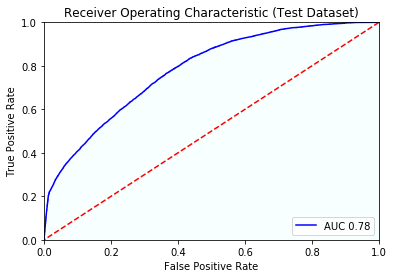

In [97]:
probpred1 = lr_proba[:,1]
fpr1, tpr1, threshold1 = roc_curve(y_test, probpred1, pos_label=2)
roc_auc1 = auc(fpr1, tpr1)
plt.title('Receiver Operating Characteristic (Test Dataset)')
plt.plot(fpr1, tpr1, 'b', label = 'AUC {}'.format(round(roc_auc1,2)))
plt.legend(loc='lower right') # posisi legend
plt.plot([1,0], [1,0], 'r--') # buat garis lurus dari kiri bawah, ke kanan atas
plt.xlim([0,1]) # sumbu x minimal di 0 maksimal di 1
plt.ylim([0,1]) # sumbu y minimal di 0 maksimal di 1
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.fill_between(fpr1, tpr1, 0, facecolor='azure',alpha=0.5)
plt.savefig('data_roc_auc.jpg')
plt.show()

From the AUC ROC results above, we can see that there is a threshold that can provide a TPR (True Positive Rate) above 80% and a relatively low FPR (False Positive Rate) of less than 40%.

In [89]:
thres_df = pd.DataFrame({'fpr': fpr1, 'tpr': tpr1, 'threshold': threshold1})
thres_df

,fpr,tpr,threshold
0,0.000000,0.000000,1.999087
1,0.000000,0.000104,0.999087
2,0.000000,0.000521,0.994445
3,0.000049,0.000521,0.994009
4,0.000049,0.001251,0.991468
...,...,...,...
9526,0.998971,1.000000,0.007719
9527,0.999265,1.000000,0.007692
9528,0.999363,1.000000,0.007666
9529,0.999510,1.000000,0.007639


In [90]:
thres_df[thres_df['tpr'] >= 0.8]

,fpr,tpr,threshold
4933,0.402755,0.800021,0.438035
4934,0.402902,0.800021,0.437924
4935,0.402902,0.800125,0.437920
4936,0.402951,0.800125,0.437850
4937,0.403049,0.800125,0.437849
...,...,...,...
9526,0.998971,1.000000,0.007719
9527,0.999265,1.000000,0.007692
9528,0.999363,1.000000,0.007666
9529,0.999510,1.000000,0.007639


And the threshold turns out to be around 44%. I will use this threshold to predict the class of accidents, and look back at the results of the FP evaluation, whether it has decreased or is it even increasing.

In [91]:
pred_thres = [1 if x<0.440126 else 2 for x in probpred1]

In [92]:
confusion_matrix(pred_thres, y_test)

array([[12215,  1932],
       [ 8187,  7659]], dtype=int64)

In [93]:
print(classification_report(pred_thres, y_test))

              precision    recall  f1-score   support

           1       0.60      0.86      0.71     14147
           2       0.80      0.48      0.60     15846

    accuracy                           0.66     29993
   macro avg       0.70      0.67      0.65     29993
weighted avg       0.70      0.66      0.65     29993



In [94]:
confusion_matrix(pred_smot, y_test)

array([[13319,  2447],
       [ 7083,  7144]], dtype=int64)

In [95]:
print(classification_report(pred_smot, y_test))

              precision    recall  f1-score   support

           1       0.65      0.84      0.74     15766
           2       0.74      0.50      0.60     14227

    accuracy                           0.68     29993
   macro avg       0.70      0.67      0.67     29993
weighted avg       0.70      0.68      0.67     29993



It turned out that what I hoped for was right. By using the new threshold, there was a significant decrease in the False Positive, namely 23.5%. This indicates that the Logistic Regression machine learning model is getting better at sorting out accident categories.